# 第6章 深度学习用于文本和序列

本章包括以下内容:  
- 将文本数据预处理为有用的数据表示
- 使用循环神经网络
- 使用一维卷积神经网络处理序列

## 6.1 处理文本数据

<img src="第6章 深度学习用于文本和序列 数据/图 6-1 从文本到标记再到向量.png" width=640 height=480>

### 代码清单 6-1 单词级的 one-hot 编码(简单示例)

In [1]:
import numpy as np


samples = ['The cat sat on the mat.', 'The dog ate my homework.']

token_index = {}
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1
            
max_length = 10

results = np.zeros(shape=(len(samples),
                          max_length,
                          max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

### 代码清单 6-2 字符级的 one-hot 编码(简单示例)

In [2]:
import string
import numpy as np


samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable
token_index = dict(zip(range(1, len(characters) + 1), characters))

max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.keys()) + 1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
        results[i, j, index] = 1.
results

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

### 代码清单 6-3 用 Keras 实现单词级的 one-hot 编码

In [3]:
from keras.preprocessing.text import Tokenizer


samples = ['The cat sat on the mat.', 'The dag ate my homework.']

tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples)

one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Using TensorFlow backend.


Found 9 unique tokens.


### 代码清单 6-4 使用散列技巧的单词级的 one-hot 编码(简单示例)

In [4]:
import numpy as np

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

dimensionality = 1000
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1.
results

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

### 代码清单 6-6 加载 IMDB 数据,准备用于 Embedding 层

In [5]:
from keras.datasets import imdb
from keras import preprocessing


max_features = 10000
maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features) # 所有评论样本使用的是前10000个常用单词
# x_train x_test 是一个np向量shape像（100，）这样，每个元素是一个list，list中的每个元素是编号的单词，所以整个list就是一个评论
print(x_test[0])
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen) 
x_test  = preprocessing.sequence.pad_sequences(x_test,  maxlen=maxlen) # 默认截断序列的前部
# 经过pad_sequences的处理每条评论被截断到设定的最长大小，shape变成了（100，20）这样的np矩阵，把之前的list截断后变为矩阵的新维度\
x_test[0]

[1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717]


array([ 286,  170,    8,  157,   46,    5,   27,  239,   16,  179,    2,
         38,   32,   25, 7944,  451,  202,   14,    6,  717], dtype=int32)

<font color="#FF0000" size=3><b>填充序列pad_sequences文档</b></font>
  
```python
keras.preprocessing.sequence.pad_sequences(sequences, maxlen=None, dtype='int32',
    padding='pre', truncating='pre', value=0.)
```

将长为nb_samples的序列（标量序列）转化为形如(nb_samples,nb_timesteps)2D numpy array。  
如果提供了参数maxlen，nb_timesteps=maxlen，否则其值为最长序列的长度。其他短于该长度的序列都会在后部填充0以达到该长度。  
长于nb_timesteps的序列将会被截断，以使其匹配目标长度。padding和截断发生的位置分别取决于padding和truncating.

**参数**

- sequences：浮点数或整数构成的两层嵌套列表

- maxlen：None或整数，为序列的最大长度。大于此长度的序列将被截短，小于此长度的序列将在后部填0.

- dtype：返回的numpy array的数据类型

- padding：‘pre’或‘post’，确定当需要补0时，在序列的起始还是结尾补

- truncating：‘pre’或‘post’，确定当需要截断序列时，从起始还是结尾截断

- value：浮点数，此值将在填充时代替默认的填充值0

**返回值**

- 返回形如(nb_samples,nb_timesteps)的2D张量


<font color="#FF0000" size=3><b>嵌入层 Embedding 文档</b></font>  

```python
keras.layers.embeddings.Embedding(input_dim, output_dim, embeddings_initializer='uniform', embeddings_regularizer=None, activity_regularizer=None, embeddings_constraint=None, mask_zero=False, input_length=None)
```

嵌入层将正整数（下标）转换为具有固定大小的向量，如[[4],[20]]->[[0.25,0.1],[0.6,-0.2]]

Embedding层只能作为模型的第一层  

**参数**

- input_dim：大或等于0的整数，字典长度，即输入数据最大下标+1

- output_dim：大于0的整数，代表全连接嵌入的维度

- embeddings_initializer: 嵌入矩阵的初始化方法，为预定义初始化方法名的字符串，或用于初始化权重的初始化器。参考initializers

- embeddings_regularizer: 嵌入矩阵的正则项，为Regularizer对象

- embeddings_constraint: 嵌入矩阵的约束项，为Constraints对象

- mask_zero：布尔值，确定是否将输入中的‘0’看作是应该被忽略的‘填充’（padding）值，该参数在使用递归层处理变长输入时有用。设置为True的话，模型中后续的层必须都支持masking，否则会抛出异常。如果该值为True，则下标0在字典中不可用，input_dim应设置为|vocabulary| + 1。

- input_length：当输入序列的长度固定时，该值为其长度。如果要在该层后接Flatten层，然后接Dense层，则必须指定该参数，否则Dense层的输出维度无法自动推断。

**输入shape**

- 形如（samples，sequence_length）的2D张量  
  
**输出shape**

- 形如(samples, sequence_length, output_dim)的3D张量

### 代码清单 6-7 在 IMDB 数据上使用 Embedding 层和分类器

In [6]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding


model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
# Embedding 层至少需要两个参数:
# 标记的个数(这里是 10000,即最大单词索引 +1)
# 嵌入的维度(这里是 8)
# 将电影评论限制为前 10 000 个最常见的单词(第一次处理这个数据集时就是这么做的),
# 然后将评论长度限制为只有 20 个单词。对于这 10 000 个单词,网络将对每个词都学习一个 8维嵌入,
# 将输入的整数序列(二维整数张量)转换为嵌入序列(三维浮点数张量),
# 然后将这个张量展平为二维,最后在上面训练一个 Dense 层用于分类
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                   validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 13s 630us/step - loss: 0.6759 - acc: 0.6050 - val_loss: 0.6398 - val_acc: 0.6814
Epoch 2/10
20000/20000 [==============================] - 1s 72us/step - loss: 0.5657 - acc: 0.7427 - val_loss: 0.5467 - val_acc: 0.7206
Epoch 3/10
20000/20000 [==============================] - 1s 72us/step - loss

### 代码清单 6-8 处理 IMDB 原始数据的标签

In [7]:
import os


imdb_dir = '第6章 深度学习用于文本和序列 数据/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname.endswith('.txt'):
            with open(os.path.join(dir_name, fname)) as f:
                tmp = f.read()
            assert tmp is not None
            texts.append(tmp)
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
                
texts[1]

'I vowed a long time ago to NEVER, EVER watch a movie that has ANYONE who EVER was a regular cast member of "Saturday Night Live". I didn\'t rent "Corky Romano" but I was forced by my unfailing good manners to watch it for half an hour. Then my good manners failed. Stupid, not funny. Tedious, not hilarious. Bad, not good. That in a nutshell is all I can say for this video.'

### 代码清单 6-9 对 IMDB 原始数据的文本进行分词

In [8]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np


maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
# sequences是一个双层列表，外层是评论，内层是单词编号

word_index = tokenizer.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
# 把列表形式的labels转换为array方便以后计算
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# 准备把数据划分为训练集和验证集
# 因为目前数据是按负面评论和正面评论分好类的
# 所以要将所有数据顺序打乱
indices = np.arange(data.shape[0])
np.random.shuffle(indices) # numpy的洗牌函数，可以把数组中元素位置随机打乱
data = data[indices] # 利用numpy的特性，通过乱序的下标来打乱元素位置
labels = labels[indices]

x_train = data[ : training_samples]
y_train = labels[ : training_samples]
x_val = data[training_samples : training_samples + validation_samples]
y_val = labels[training_samples : training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


### 代码清单 6-10 解析 GloVe 词嵌入文件

In [9]:
glove_dir = '第6章 深度学习用于文本和序列 数据/glove.6B'

embeddings_index = {}
with open(os.path.join(glove_dir, 'glove.6B.100d.txt')) as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
print('Found {} words vectors.'.format(len(embeddings_index)))

Found 400000 words vectors.


### 代码清单 6-11 准备 GloVe 词嵌入矩阵

In [10]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
embedding_matrix.shape

(10000, 100)

### 代码清单 6-12 模型定义

In [11]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense


model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


### 代码清单 6-13 将预训练的词嵌入加载到 Embedding 层中

In [12]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
# 需要冻结 Embedding 层(即将其 trainable 属性设为 False)

### 代码清单 6-14 训练与评估

In [13]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                     epochs=10,
                     batch_size=32,
                     validation_data=(x_val, y_val))
model.save_weights('第6章 深度学习用于文本和序列 数据/pre_trained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 1.6934 - acc: 0.4750 - val_loss: 0.6939 - val_acc: 0.5096
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.6308 - acc: 0.6650 - val_loss: 0.7610 - val_acc: 0.5071
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.6321 - acc: 0.6100 - val_loss: 0.7928 - val_acc: 0.4956
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4817 - acc: 0.7450 - val_loss: 0.7643 - val_acc: 0.5172
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.3319 - acc: 0.8850 - val_loss: 0.7048 - val_acc: 0.5604
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2319 - acc: 0.9600 - val_loss: 0.7422 - val_acc: 0.5593
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.1949 - acc: 0.9350 - val_loss: 0.8707 - val_acc: 0.5173
Epoch 8/10
200/200 [========

### 代码清单 6-15 绘制结果

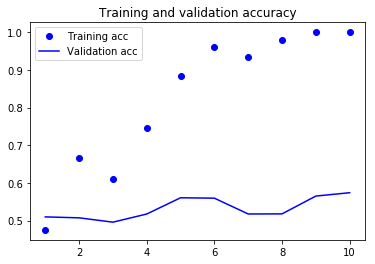

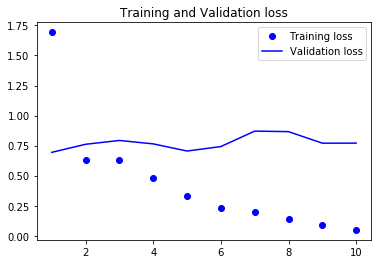

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and Validation loss")
plt.legend(loc='best')

### 代码清单 6-16 在不使用预训练词嵌入的情况下,训练相同的模型

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 0.6899 - acc: 0.4800 - val_loss: 0.7024 - val_acc: 0.5197
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4968 - a

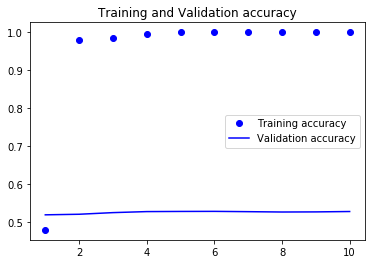

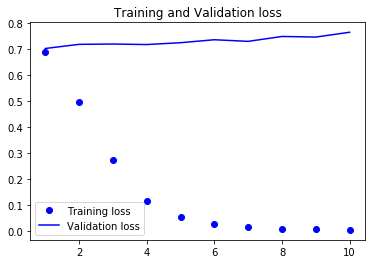

In [15]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
import matplotlib.pyplot as plt


model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure()
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title("Training and Validation accuracy")
plt.legend(loc='best')

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and Validation loss")
plt.legend(loc='best')

plt.show()

### 代码清单 6-17 对测试集数据进行分词

In [16]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ('neg', 'pos'):
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname.endswith('.txt'):
            with open(os.path.join(dir_name, fname)) as f:
                texts.append(f.read())
            if label_type == 'neg':
                labels.append(1)
            else:
                labels.append(0)
                
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)
x_test.shape

(25000, 100)

### 代码清单 6-18 在测试集上评估模型

In [17]:
model.load_weights('第6章 深度学习用于文本和序列 数据/pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 31us/step


[0.9941937937927247, 0.43724]

## 6.2 理解循环神经网络

<img src="第6章 深度学习用于文本和序列 数据/图 6-9 循环网络:带有环的网络.png" width=640 height=480>

### 代码清单 6-19 RNN 伪代码

```python
state_t = 0  # t时刻的状态
for input_t in input_sequence: # 对序列元素进行遍历
    output_t = f(input_t, state_t)
    state_t = output_t # 前一次的输出变成下一次跌迭代的状态
```

### 代码清单 6-20 更详细的 RNN 伪代码

```python
state_t = 0
for input_t in input_sequcece:
    output_t = activation(dot(W, input_t) + dot(U, state_t) + b)
    # 从输入和状态到输出的变换,其参数包括两个矩阵(W 和 U)和一个偏置向量。
    # 它类似于前馈网络中密集连接层所做的变换
    state_t = output_t
```

### 代码清单 6-21 简单 RNN 的 Numpy 实现

In [18]:
import numpy as np


timesteps = 100       # 输入序列的时间步数
input_features = 32   # 输入特征空间的维度
output_features = 64  # 输出特征空间的维度

inputs = np.random.random((timesteps, input_features)) # 输入数据：随机噪声，仅作为示例

state_t = np.zeros((output_features,)) # 初始状态：全零向量

# 创建谁及的权重矩阵
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs: # input_t是形状为(features,)的向量
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b) # 由输入和当前状态(前一个输出)计算得到当前输出
    
    successive_outputs.append(output_t) # 将这个输出序列保存到一个列表中
    
    state_t = output_t # 更新网络的状态，用于下一个时间布
    
final_output_sequence = np.stack(successive_outputs, axis=0) # 最终输出是一个形状为(timesteps, output_features)的二维张量

#-------------------------------------------------------------------------------------------------------------------
# 本例中,最终输出是一个形状为 (timesteps, output_features) 的二维张量,其中每个时间步是循环在 t 时刻的输出。
# 输出张量中的每个时间步 t 包含输入序列中时间步0~t 的信息,即关于全部过去的信息。
# 因此,在多数情况下,你并不需要这个所有输出组成的序列,你只需要最后一个输出(循环结束时的 output_t),因为它已经包含了整个序列的信息。
#-------------------------------------------------------------------------------------------------------------------

### 代码清单 6-22 准备 IMDB 数据

In [19]:
from keras.datasets import imdb
from keras.preprocessing import sequence


max_features = 10000 # 作为特征的单词个数
maxlen = 500 # 每个文本中截取前500个或后500个单词作为新的文本(这些文本中的单词都属于前max_features个最常见的单词)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


### 代码清单 6-23 用 Embedding 层和 SimpleRNN 层来训练模型

In [20]:
from keras.layers import Dense, Embedding, SimpleRNN
from keras.models import Sequential


model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32)) 
# model.add(SimpleRNN(32, return_sequences=True))
# 这样设置所有中间层都返回完整的输出序列，也就是每个时间布的输出组成的序列，输出和输入的形状应该相同
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 18s 904us/step - loss: 0.6491 - acc: 0.6068 - val_loss: 0.5903 - val_acc: 0.6842
Epoch 2/10
20000/20000 [==============================] - 18s 912us/step - loss: 0.4309 - acc: 0.8143 - val_loss: 0.4155 - val_acc: 0.8270
Epoch 3/10
20000/20000 [==============================] - 19s 964us/step 

### 代码清单 6-24 绘制结果

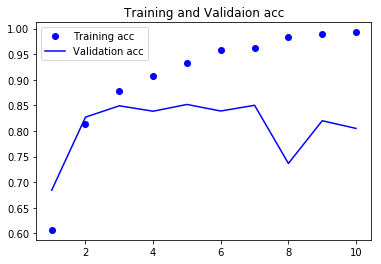

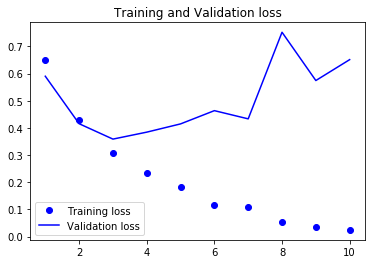

In [21]:
import matplotlib.pyplot as plt


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validaion acc')
plt.legend(loc='best')

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend(loc='best')

### 代码清单 6-27 使用 Keras 中的 LSTM 层

<img src="第6章 深度学习用于文本和序列 数据/图 6-14 从 SimpleRNN 到 LSTM:添加一个携带轨道.png">

<img src="第6章 深度学习用于文本和序列 数据/图 6-15 剖析 LSTM.png">

**LSTM 单元的作用:允许过去的信息稍后重新进入,从而解决梯度消失问题**

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 74s 4ms/step - loss: 0.5096 - acc: 0.7618 - val_loss: 0.3374 - val_acc: 0.8668
Epoch 2/10
20000/20000 [==============================] - 73s 4ms/step - loss: 0.2854 - acc: 0.8887 - val_loss: 0.3962 - val_acc: 0.8224
Epoch 3/10
20000/20000 [==============================] - 74s 4ms/step - loss

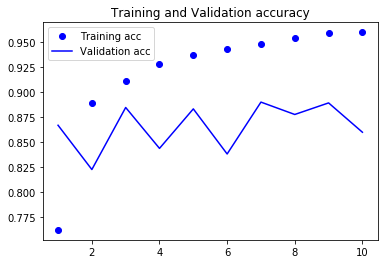

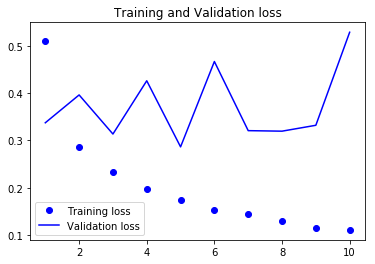

In [22]:
from keras.layers import LSTM, Embedding, Dense
from keras.models import Sequential
import matplotlib.pyplot as plt


model = Sequential()
model.add(Embedding(max_features, 32)) # Embedding层要后接Flatten层的话，必须指定input_length
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend(loc='best')

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend(loc='best')

plt.show()

## 6.3 循环神经网络的高级用法

### 代码清单 6-28 观察耶拿天气数据集的数据

In [29]:
import os


data_dir = '第6章 深度学习用于文本和序列 数据/jena_climate'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

with open(fname) as f:
    data = f.read()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551


### 代码清单 6-29 解析数据

In [30]:
import numpy as np


float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i] = values

### 代码清单 6-30 绘制温度时间序列

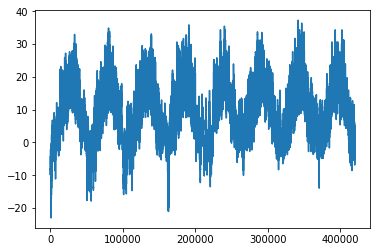

In [31]:
from matplotlib import pyplot as plt


temp = float_data[:, 1]
plt.plot(range(len(temp)), temp)
plt.show()

### 代码清单 6-31 绘制前 10 天的温度时间序列

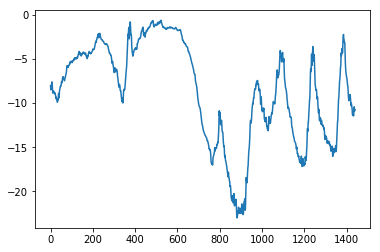

In [32]:
plt.plot(range(1440), temp[:1440])

### 代码清单 6-32 数据标准化

In [33]:
# 预处理数据的方法是,将每个时间序列减去其平均值,然后除以其标准差。

mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std
float_data.shape

(420551, 14)

### 代码清单 6-33 生成时间序列样本及其目标的生成器

In [34]:
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    # 当max_index输入的是None时，max_index设定为data最后一个下表减去delay
    if max_index is None:
        max_index = len(data) - delay - 1
    # 设定i的初始值，为什么要加上lookback是因为后面选择时间步区间是range(n-lookback, n, step)来选取的
    i = min_index + lookback
    # 对于这个生成器，其没有在循环中使用break，所以是无限循环的
    # 在外部使用这个生成器时，需要注意break
    while True:
        if shuffle:
            # 当需要打乱样本时，随机在min_index + lookback到max_index之间的选出size个整数作为被选数据行的下标
            # 为什么要加上lookback，是因为实际后面使用的数据是一段时间的数据，这一段时间就是lookback的长度
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            # 当不需要打乱样本时
            # 当i + batch_size将越界时，重置i的值为初始值
            if i + batch_size >= max_index:
                i = min_index + lookback
            # 选取样本下表，这个样本下标是顺序选择的
            # 这里做了预防下标越界的处理选取了i+batch_size和max_index中的最小值，以防下标越过max_index
            rows = np.arange(i, min(i + batch_size, max_index))
            # i自加一组样本下表的值，以便下一次取得后面一组样本
            i += len(rows)
        
        # 样本的形状是(batch_size,单个序列样本的大小(时间步), 每个数据向量的维度)
        # 比如 (128, 1440//6, 14) 就是每个batch_size是128个训练样本，每个训练样本是一个1440//6=240时间步，
        # 每个时间的单数据向量维度是14的一个三维矩阵
        samples = np.zeros((len(rows),
                            lookback // step,
                            data.shape[-1]))
        # 目标是选择的训练样本中最后一个时间步+delay的温度数据，所以每个样本对应一个温度数据，这里应该是128个
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            # 这里利用numpy可以使用矩阵或序列选择元素的特性
            # 使用range在一个lookback大小中按照step选出连续并间隔step的1440//6=240个数据为下标
            indices = range(rows[j] - lookback, rows[j], step)
            # 通过下表序列选出元素
            samples[j] = data[indices]
            # 通过delay选出对应的targets
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

### 代码清单 6-34 准备训练生成器、验证生成器和测试生成器

In [35]:
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step,
                      batch_size=batch_size)

val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)

test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

val_steps = (300000 - 200001 - lookback) // batch_size
test_steps = (len(float_data) - 300001 - lookback) // batch_size
val_steps

769

### 代码清单 6-35 计算符合常识的基准方法的 MAE

In [30]:
#-------------------------------------------------------------------------------------------------------
# 本例中,我们可以放心地假设,温度时间序列是连续的(明天的温度很可能接近今天的温度),并且具有每天的周期性变化。
# 因此,一种基于常识的方法就是始终预测 24 小时后的温度等于现在的温度。我们使用平均绝对误差(MAE)指标来评估这种方法。
# np.mean(np.abs(preds - targets))
#-------------------------------------------------------------------------------------------------------

def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))
    
evaluate_naive_method()

0.2897359729905486


### 代码清单 6-36 将 MAE 转换成摄氏温度误差

In [31]:
#-------------------------------------------------------------------------------------------------------
# 得到的 MAE 为 0.29。因为温度数据被标准化成均值为 0、标准差为 1,所以无法直接对这个值进行解释。
# 它转化成温度的平均绝对误差为 0.29×temperature_std 摄氏度,即 2.57°C。
#-------------------------------------------------------------------------------------------------------

celsius_mae = 0.29 * std[1]
celsius_mae

2.5672247338393395

### 代码清单 6-37 训练并评估一个密集连接模型

In [36]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop


model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))
model.summary()

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 3360)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                107552    
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 33        
Total params: 107,585
Trainable params: 107,585
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
500/500 [==============================] - 9s 19ms/step - loss: 1.5911 - val_loss: 0.9303
Epoch 2/20
500/500 [==============================] - 9s 18ms/step - loss: 0.5623 - val_loss: 0.3476
Epoch 3/20
500/500 [==============================] - 9s 18ms/step - loss: 0.3252 - val_loss: 0.3183
Epoch 4/20
500/500 [==============================] - 9s 18ms/step - loss: 0.2811 - val_loss: 0.3

### 代码清单 6-38 绘制结果

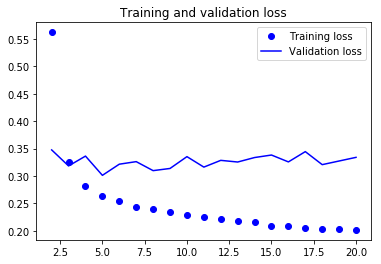

In [39]:
import matplotlib.pyplot as plt


loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs[1:], loss[1:], 'bo', label='Training loss')
plt.plot(epochs[1:], val_loss[1:], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc='best')

plt.show()

### 代码清单 6-39 训练并评估一个基于 GRU 的模型

Epoch 1/20
500/500 [==============================] - 109s 217ms/step - loss: 0.3016 - val_loss: 0.2714
Epoch 2/20
500/500 [==============================] - 106s 212ms/step - loss: 0.2848 - val_loss: 0.2646
Epoch 3/20
500/500 [==============================] - 106s 212ms/step - loss: 0.2788 - val_loss: 0.2769
Epoch 4/20
500/500 [==============================] - 106s 212ms/step - loss: 0.2718 - val_loss: 0.2719
Epoch 5/20
500/500 [==============================] - 106s 212ms/step - loss: 0.2634 - val_loss: 0.2689
Epoch 6/20
500/500 [==============================] - 106s 212ms/step - loss: 0.2594 - val_loss: 0.2693
Epoch 7/20
500/500 [==============================] - 107s 215ms/step - loss: 0.2531 - val_loss: 0.2789
Epoch 8/20
500/500 [==============================] - 109s 218ms/step - loss: 0.2481 - val_loss: 0.2751
Epoch 9/20
500/500 [==============================] - 109s 217ms/step - loss: 0.2460 - val_loss: 0.2790
Epoch 10/20
500/500 [==============================] - 108s 215m

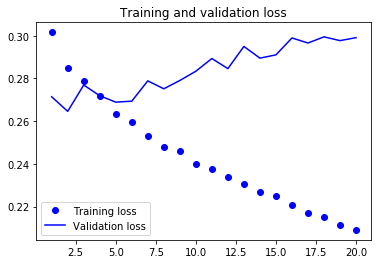

In [42]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
from matplotlib import pyplot as plt


model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc='best')

plt.show()

### 代码清单 6-40 训练并评估一个使用 dropout 正则化的基于 GRU 的模型

Epoch 1/40
500/500 [==============================] - 128s 256ms/step - loss: 0.3417 - val_loss: 0.2737
Epoch 2/40
500/500 [==============================] - 130s 260ms/step - loss: 0.3131 - val_loss: 0.2761
Epoch 3/40
500/500 [==============================] - 126s 252ms/step - loss: 0.3077 - val_loss: 0.2686
Epoch 4/40
500/500 [==============================] - 127s 254ms/step - loss: 0.3034 - val_loss: 0.2672
Epoch 5/40
500/500 [==============================] - 127s 255ms/step - loss: 0.2992 - val_loss: 0.2661
Epoch 6/40
500/500 [==============================] - 128s 255ms/step - loss: 0.2969 - val_loss: 0.2677
Epoch 7/40
500/500 [==============================] - 126s 253ms/step - loss: 0.2969 - val_loss: 0.2649
Epoch 8/40
500/500 [==============================] - 125s 250ms/step - loss: 0.2949 - val_loss: 0.2671
Epoch 9/40
500/500 [==============================] - 126s 252ms/step - loss: 0.2928 - val_loss: 0.2636
Epoch 10/40
500/500 [==============================] - 126s 251m

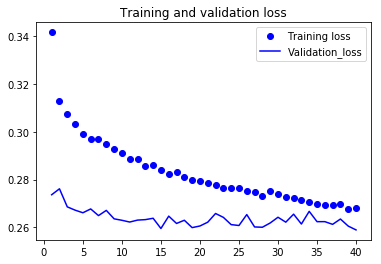

In [44]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
from matplotlib import pyplot as plt


model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.2,           # 输入单元的dropout比例(应该是对时间步这个维度做dropout)
                     recurrent_dropout=0.2, # 循环网络中循环dropout的比例(应该是对每个时间步中的向量做dropout)
                     input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation_loss')
plt.title('Training and validation loss')
plt.legend(loc='best')

plt.show()

### 代码清单 6-41 训练并评估一个使用 dropout 正则化的堆叠 GRU 模型

Epoch 1/40
500/500 [==============================] - 256s 513ms/step - loss: 0.3368 - val_loss: 0.2842
Epoch 2/40
500/500 [==============================] - 255s 510ms/step - loss: 0.3126 - val_loss: 0.2724
Epoch 3/40
500/500 [==============================] - 259s 518ms/step - loss: 0.3055 - val_loss: 0.2724
Epoch 4/40
500/500 [==============================] - 257s 513ms/step - loss: 0.3017 - val_loss: 0.2723
Epoch 5/40
500/500 [==============================] - 257s 513ms/step - loss: 0.2993 - val_loss: 0.2692
Epoch 6/40
500/500 [==============================] - 259s 517ms/step - loss: 0.2977 - val_loss: 0.2697
Epoch 7/40
500/500 [==============================] - 258s 515ms/step - loss: 0.2945 - val_loss: 0.2705
Epoch 8/40
500/500 [==============================] - 253s 506ms/step - loss: 0.2912 - val_loss: 0.2645
Epoch 9/40
500/500 [==============================] - 254s 509ms/step - loss: 0.2884 - val_loss: 0.2660
Epoch 10/40
500/500 [==============================] - 259s 518m

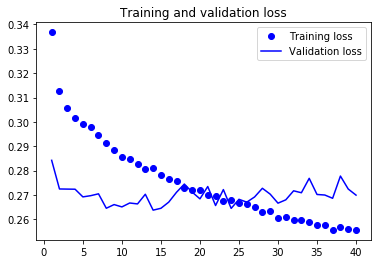

In [45]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
from matplotlib import pyplot as plt


model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.1,
                     recurrent_dropout=0.5,
                     return_sequences=True,
                     input_shape=(None, float_data.shape[-1])))
model.add(layers.GRU(64, activation='relu',
                     dropout=0.1,
                     recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc='best')

plt.show()

### 代码清单 6-42 使用逆序序列训练并评估一个 LSTM

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 70s 4ms/step - loss: 0.4984 - acc: 0.7660 - val_loss: 0.3877 - val_acc: 0.8444
Epoch 2/10
20000/20000 [==============================] - 69s 3ms/step - loss: 0.3397 - acc: 0.8698 - val_loss: 0.3687 - val_acc: 0.8428
Epoch 3/10
20000/20000 [==============================] - 69s 3ms/step - loss: 0.2571 - acc: 0.9039 - val_loss: 0.3240 - val_acc: 0.8650
Epoch 4/10
20000/20000 [==============================] - 69s 3ms/step - loss: 0.2215 - acc: 0.9190 - val_loss: 0.3633 - val_acc: 0.8820
Epoch 5/10
20000/20000 [==============================] - 69s 3ms/step - loss: 0.1943 - acc: 0.9325 - val_loss: 0.3881 - val_acc: 0.8452
Epoch 6/10
20000/20000 [==============================] - 69s 3ms/step - loss: 0.1770 - acc: 0.9388 - val_loss: 0.3517 - val_acc: 0.8792
Epoch 7/10
20000/20000 [==============================] - 69s 3ms/step - loss: 0.1606 - acc: 0.9448 - val_loss: 0.5373 - val_acc:

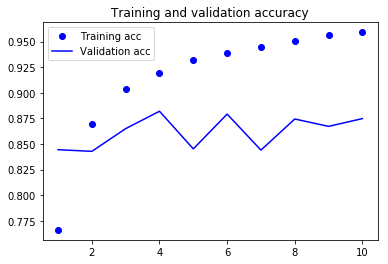

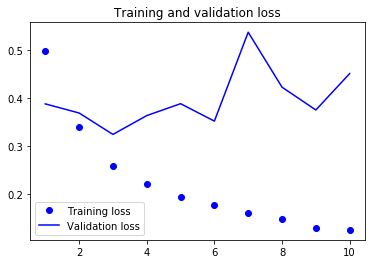

In [50]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential
from matplotlib import pyplot as plt


max_features = 10000
maxlen = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend(loc='best')

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc='best')

plt.show()

### 代码清单 6-43 训练并评估一个双向 LSTM

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 142s 7ms/step - loss: 0.5721 - acc: 0.6928 - val_loss: 0.4072 - val_acc: 0.8322
Epoch 2/10
20000/20000 [==============================] - 140s 7ms/step - loss: 0.3249 - acc: 0.8756 - val_loss: 0.3286 - val_acc: 0.8654
Epoch 3/10
20000/20000 [==============================] - 140s 7ms/step - loss: 0.2282 - acc: 0.9180 - val_loss: 0.3083 - val_acc: 0.8878
Epoch 4/10
20000/20000 [==============================] - 140s 7ms/step - loss: 0.1747 - acc: 0.9407 - val_loss: 0.3163 - val_acc: 0.8788
Epoch 5/10
20000/20000 [==============================] - 140s 7ms/step - loss: 0.1354 - acc: 0.9546 - val_loss: 0.3631 - val_acc: 0.8798
Epoch 6/10
20000/20000 [==============================] - 140s 7ms/step - loss: 0.1059 - acc: 0.9662 - val_loss: 0.3971 - val_acc: 0.8682
Epoch 7/10
20000/20000 [==============================] - 140s 7ms/step - loss: 0.0890 - acc: 0.9720 - val_loss: 0.4433 - v

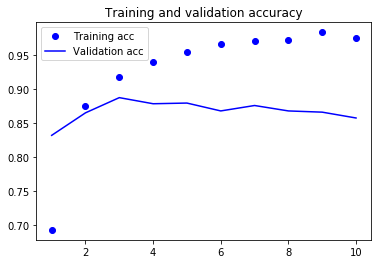

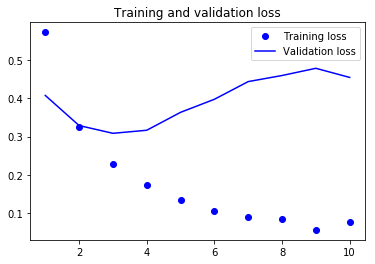

In [52]:
# 导入包和数据接上一个cell

model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend(loc='best')

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc='best')

plt.show()

### 代码清单 6-44 训练一个双向 GRU

Epoch 1/40
500/500 [==============================] - 206s 411ms/step - loss: 0.2918 - val_loss: 0.2775
Epoch 2/40
500/500 [==============================] - 204s 409ms/step - loss: 0.2751 - val_loss: 0.2743
Epoch 3/40
500/500 [==============================] - 204s 407ms/step - loss: 0.2688 - val_loss: 0.2721
Epoch 4/40
500/500 [==============================] - 203s 406ms/step - loss: 0.2628 - val_loss: 0.2803
Epoch 5/40
500/500 [==============================] - 204s 407ms/step - loss: 0.2565 - val_loss: 0.2710
Epoch 6/40
500/500 [==============================] - 204s 407ms/step - loss: 0.2494 - val_loss: 0.2824
Epoch 7/40
500/500 [==============================] - 204s 407ms/step - loss: 0.2429 - val_loss: 0.2818
Epoch 8/40
500/500 [==============================] - 203s 407ms/step - loss: 0.2352 - val_loss: 0.2858
Epoch 9/40
500/500 [==============================] - 204s 408ms/step - loss: 0.2278 - val_loss: 0.2840
Epoch 10/40
500/500 [==============================] - 203s 406m

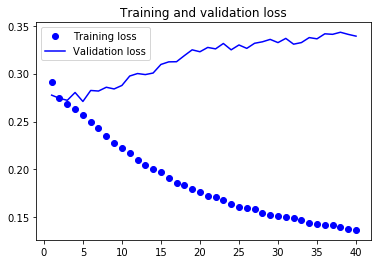

In [54]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
from matplotlib import pyplot as plt


model = Sequential()
model.add(layers.Bidirectional(layers.GRU(32), input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')

history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc='best')

plt.show()

## 6.4 用卷积神经网络处理序列

<img src="第6章 深度学习用于文本和序列 数据/图 6-26 一维卷积神经网络的工作原理:每个输出时间步都是利用输入序列在时间维度上的一小段得到的.png">

### 代码清单 6-45 准备IMDB数据

In [15]:
from keras.datasets import imdb
from keras.preprocessing import sequence


max_features = 10000
max_len = 500

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


### 代码清单 6-46 在 IMDB 数据上训练并评估一个简单的一维卷积神经网络

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 98, 32)            0         
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
_________________________________________________________________


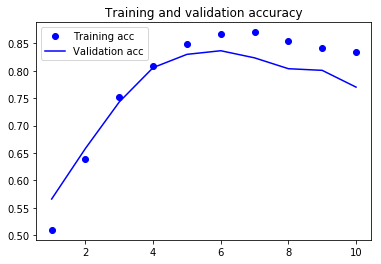

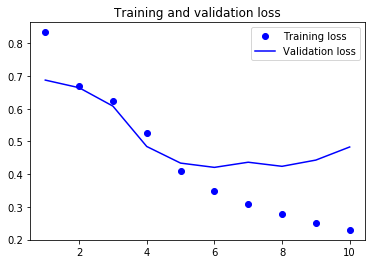

In [16]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
from matplotlib import pyplot as plt


model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5)) # 当池化的步长参数未输入时，那么步长等于池化的窗口带大小
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
len(acc)

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend(loc='best')

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc='best')

plt.show()

### 代码清单 6-47 在耶拿数据上训练并评估一个简单的一维卷积神经网络

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_29 (Conv1D)           (None, None, 32)          2272      
_________________________________________________________________
max_pooling1d_20 (MaxPooling (None, None, 32)          0         
_________________________________________________________________
conv1d_30 (Conv1D)           (None, None, 32)          5152      
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, None, 32)          0         
_________________________________________________________________
conv1d_31 (Conv1D)           (None, None, 32)          5152      
_________________________________________________________________
global_max_pooling1d_8 (Glob (None, 32)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 33        
Total para

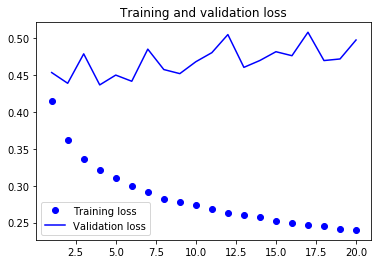

In [39]:
# 以下示例复用了前面定义的这些变量:float_data、train_gen、val_gen 和 val_steps

from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
from matplotlib import pyplot as plt


model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu', input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc='best')

plt.show()

### 代码清单 6-48 为耶拿数据集准备更高分辨率的数据生成器

In [40]:
step = 3
lookback = 720
delay = 144

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step)
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step)
val_steps = (300000 - 200001 - lookback) // 128
test_steps = (len(float_data) - 300001 - lookback) // 128

### 代码清单 6-49 结合一维卷积基和 GRU 层的模型

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_37 (Conv1D)           (None, None, 32)          2272      
_________________________________________________________________
max_pooling1d_25 (MaxPooling (None, None, 32)          0         
_________________________________________________________________
conv1d_38 (Conv1D)           (None, None, 32)          5152      
_________________________________________________________________
gru_3 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 33        
Total params: 13,697
Trainable params: 13,697
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
500/500 [==============================] - 48s 96ms/step - loss: 0.3399 - val_loss: 0.2847
Epoch 2/20
500/500 [================

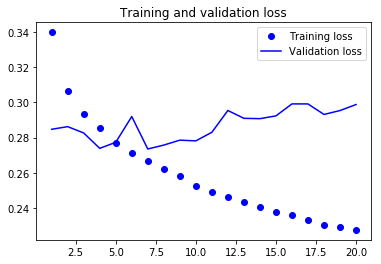

In [46]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
from matplotlib import pyplot as plt


model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu', input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc='best')

plt.show()